In [174]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container { width: 95%;} div#menubar-container { width: 85%; } div#maintoolbar-container { width: 99%; } </style> """))

#%matplotlib inline
%matplotlib notebook

import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
import os
import io
import datetime
from dateutil import parser, rrule
from datetime import datetime, time, date
import time
import keras 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import requests
import scipy
import tensorflow as tf
import re

# import function from current working directory
from getRainfallData import getRainfallData


pd.set_option('display.max_rows', 5000)    
np.set_printoptions(suppress=True)

In [119]:
#### From  TS prediction tutrial 

In [120]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

In [158]:
gapstarts_Dates, gapends_Dates =  find_date_gaps(PPG_data_smallfilled, Colinterest)    # ID the gaps after filling the single day ones

gooddataend = gapstarts_Dates[0]-pd.Timedelta('1 day')                                # this is where the good data ends

# Create the dataset to train on
dataset = PPG_data_smallfilled['RH_pct'].loc[:gooddataend]
dataset = dataset.to_frame()
#dataset = np.asarray(dataset, 'float32')


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


3147 1551
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 4s - loss: 0.0259
Epoch 2/100
 - 4s - loss: 0.0120
Epoch 3/100
 - 4s - loss: 0.0119
Epoch 4/100
 - 4s - loss: 0.0119
Epoch 5/100
 - 4s - loss: 0.0119
Epoch 6/100
 - 4s - loss: 0.0118
Epoch 7/100
 - 4s - loss: 0.0118
Epoch 8/100
 - 4s - loss: 0.0119
Epoch 9/100
 - 4s - loss: 0.0119
Epoch 10/100
 - 4s - loss: 0.0119
Epoch 11/100
 - 4s - loss: 0.0119
Epoch 12/100
 - 4s - loss: 0.0119
Epoch 13/100
 - 4s - loss: 0.0119
Epoch 14/100
 - 4s - loss: 0.0118
Epoch 15/100
 - 3s - loss: 0.0119
Epoch 16/100
 - 4s - loss: 0.0119
Epoch 17/100
 - 4s - loss: 0.0119
Epoch 18/100
 - 4s - loss: 0.0118
Epoch 19/100
 - 4s - loss: 0.0119
Epoch 20/100
 - 4s - loss: 0.0119
Epoch 21/100
 - 3s - loss: 0.0119
Epoch 22/100
 - 4s - loss: 0.0119
Epoch 23/100
 - 3s - loss: 0.0119
Epoch 24/100
 - 4s - loss: 0.0118
Epoch 25/100
 - 4s - loss: 0.0118
Epoch 26/100
 - 4s - loss: 0.

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [159]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.23 RMSE
Test Score: 4.27 RMSE


<IPython.core.display.Javascript object>


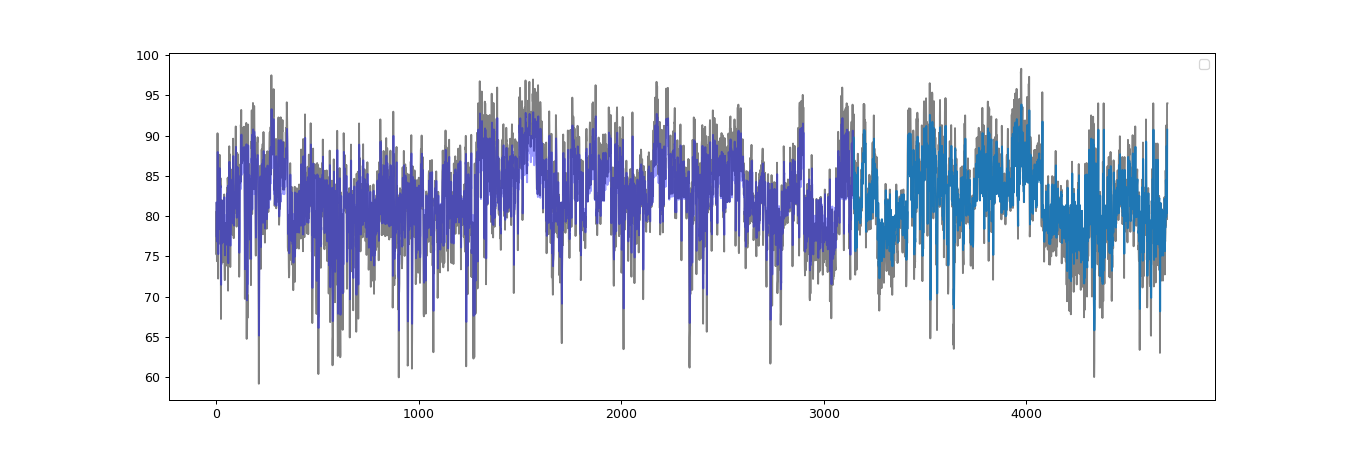

No handles with labels found to put in legend.


In [168]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
fig, ax = plt.subplots(figsize =(15,5))
plt.plot(scaler.inverse_transform(dataset), color = 'grey')
plt.plot(trainPredictPlot, color ='b', alpha = .4)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

In [144]:
# test with the mastery tutorual 

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
save_to = os.path.join("..", 'Data', "All_consolodated_Q_m3ps.csv")

r = requests.get(url, allow_redirects=True)
open(save_to, 'wb').write(r.content)

dataset  = pd.read_csv(save_to ,usecols=[1], engine='python')   # read in data


# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# fix random seed for reproducibility
numpy.random.seed(7)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()